In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
#use east coast time zone
#sd = dt.datetime(2018,12,28) - dt.timedelta(days=7*14)
#ed = dt.datetime(2019,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2020,1,3) - dt.timedelta(days=7*15)
#ed = dt.datetime(2020,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2021,1,1) - dt.timedelta(days=7*15)
#ed = dt.datetime(2021,12,31) + dt.timedelta(days=1)
sd = dt.datetime(2016,1,22) - dt.timedelta(days=200)
ed = dt.datetime(2023,5,5) + dt.timedelta(days=1)

ticker_name = 'TQQQ'

ticker = ab.StockData(ticker_name)
ticker.get_data_from_yfinance(ticker_name,sd,ed+dt.timedelta(days=1))

ffty = ab.StockData('FFTY')
ffty.get_data_from_yfinance('FFTY',sd,ed+dt.timedelta(days=1))

spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY',sd,ed+dt.timedelta(days=1))

#set max number of rows to display
pd.set_option('display.max_rows', 1000)

GPU acceleration is available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
test_start = dt.datetime(2016,1,22)
test_end = dt.datetime(2023,5,5)
plot_start = dt.datetime(2016,1,22)
plot_end =   dt.datetime(2023,5,5)

In [3]:
#buy and hold
bah = ab.BuyAndHold(ticker)
bah.run_strategy(ticker,test_start,test_end)
bah.trades

,Signal
Date,
2016-01-22,1
2023-05-05,-1


In [4]:

bah_bt = ab.BackTest()
bah_bt.run_backtest(bah,ticker,test_start,test_end)


<Ab.StockData object at 0x7fa224157b20>:
cumulative return      : 656.47%
compound anual return  : 33.5185%
max_drawdown           : -81.11%
sharp_ratio            : 4.76%
average of daily return: 0.2047%
std of daily return    : 4.3039%
number of trades       : 2,
trading days           : 2660,
batting Average        : 100.00%
Gain Average           : 656.47%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        
    Buy Date  Sell Date Ticker     Quant  Buy Price  Sell Price    Profit  \
0 2016-01-22 2023-05-05   TQQQ  0.268156   3.729167   28.209999  6.564692   

   Profit %  HoldingDays  LongTermProfit  ShortTermProfit  TaxCollectYear  \
0  6.564692         2660        6.564692              0.0            2024   

   TaxCollected  
0           0.0  


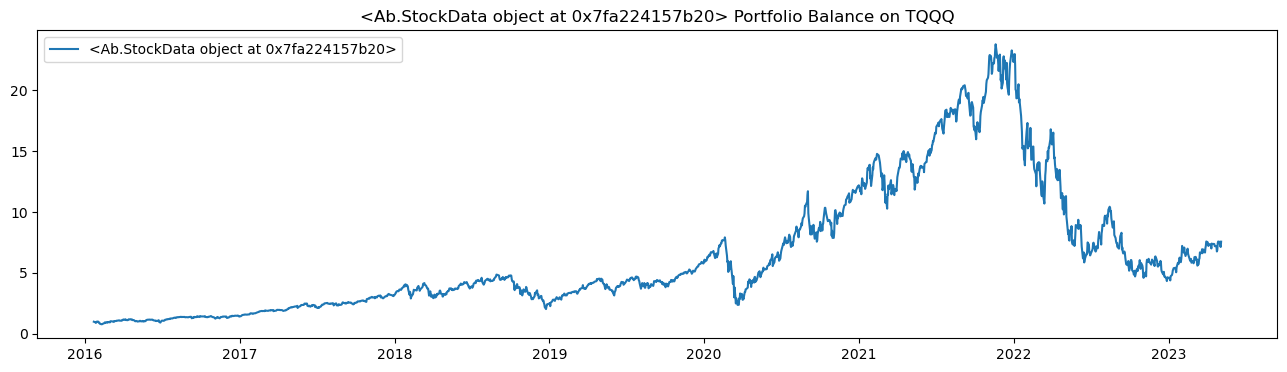

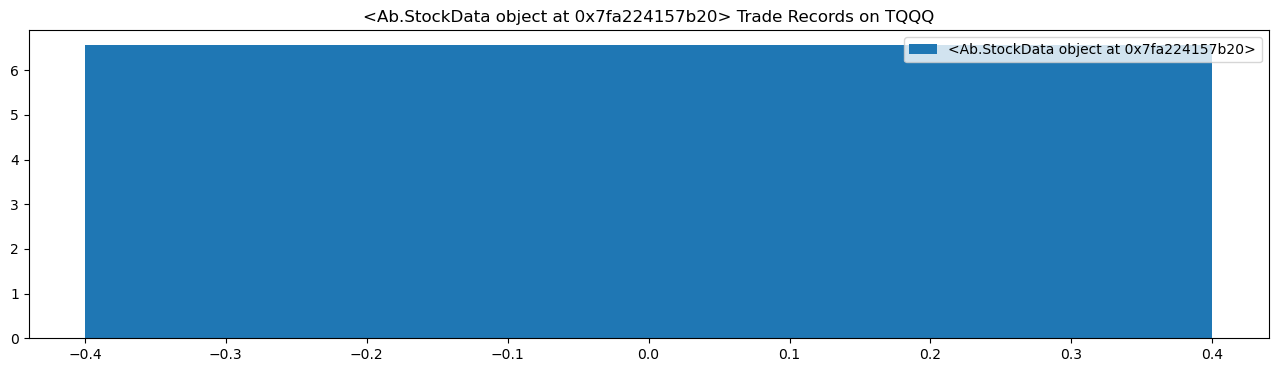

In [5]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()
print(bah_bt.trade_records)

In [6]:
stg = ab.fftyspy_stg(ffty_sell_threshold = 0.95, ffty_buy_threshold = 1.02, 
                                            spy_consecutive_buy_threshold = 1, spy_consecutive_days = 20,
                                            spy_max_off_new_high_pct = -0.2)
stg.run_strategy([ffty,spy], test_start, test_end)


In [7]:

stg_bt = ab.BackTest()
stg_bt.run_backtest(stg,ticker,test_start,test_end)



fftyspy_stg:
cumulative return      : 2033.27%
compound anual return  : 54.8331%
max_drawdown           : -36.19%
sharp_ratio            : 7.47%
average of daily return: 0.2052%
std of daily return    : 2.7484%
number of trades       : 5,
trading days           : 2660,
batting Average        : 100.00%
Gain Average           : 146.15%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : 138.52%
Loss STD               : nan%
        
    Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price  \
0 2016-07-08  2018-10-10 00:00:00   TQQQ  0.231481   4.320000   13.942500   
1 2019-02-12  2020-02-27 00:00:00   TQQQ  0.262606  12.290000   18.955000   
2 2020-05-27  2021-12-13 00:00:00   TQQQ  0.248885  20.000000   80.135002   
3 2022-11-30  2023-04-25 00:00:00   TQQQ  0.846537  23.559999   25.200001   

      Profit  Profit %  HoldingDays  LongTermProfit  ShortTermProfit  \
0   2.227430  2.227430        824.0        2.227430         0.000000   
1 

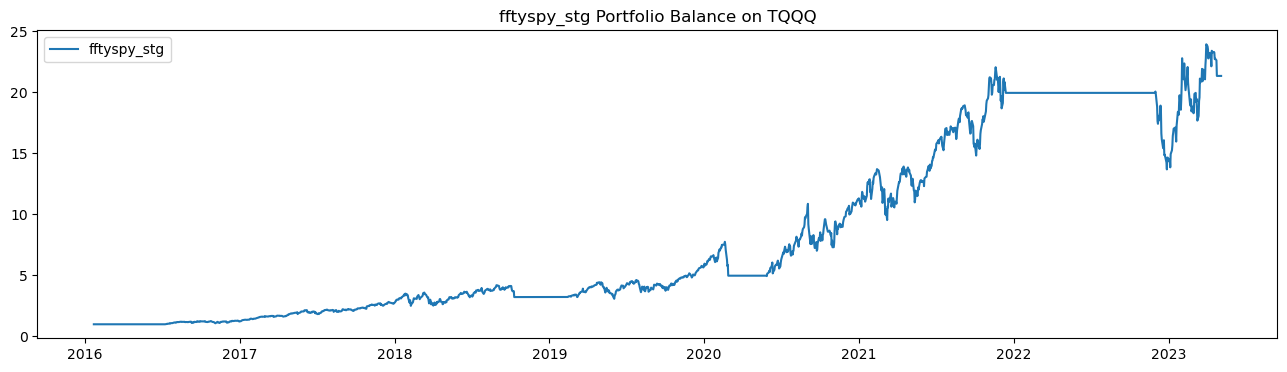

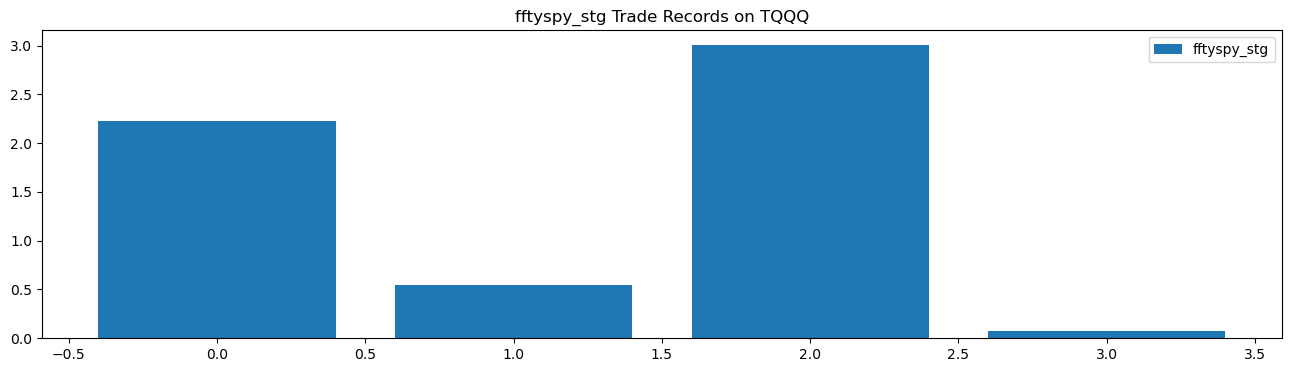

In [8]:
stg_bt.plot_balance()
stg_bt.plot_records()
stg_bt.performance_summary()
print(stg_bt.trade_records)


Index(['TQQQ', 'Weekday', 'Signal', 'BSignal', 'SSignal', 'Cash', 'Stock',
       'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'FFTY',
       'FFTY-SMA200', 'FFTY_to_SMA200', 'FFTY_Signal', 'SPY', 'SPY-SMA200',
       'new_high', 'off_new_high', 'max_off_new_high', 'SPY-to-SMA200',
       'SPY-to-SMA200_prev', 'spy-ready-to-buy', 'SPY_Signal'],
      dtype='object')
Index(['FFTY', 'FFTY-SMA200', 'FFTY_to_SMA200', 'FFTY_Signal', 'SPY',
       'SPY-SMA200', 'new_high', 'off_new_high', 'max_off_new_high',
       'SPY-to-SMA200', 'SPY-to-SMA200_prev', 'spy-ready-to-buy',
       'SPY_Signal'],
      dtype='object')


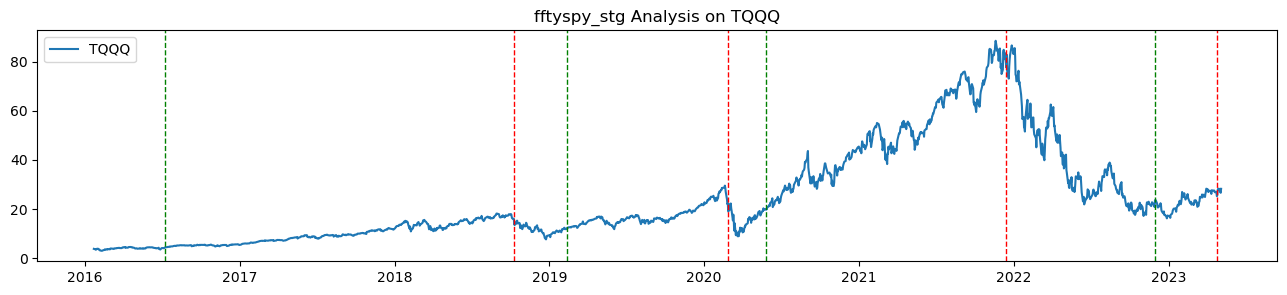

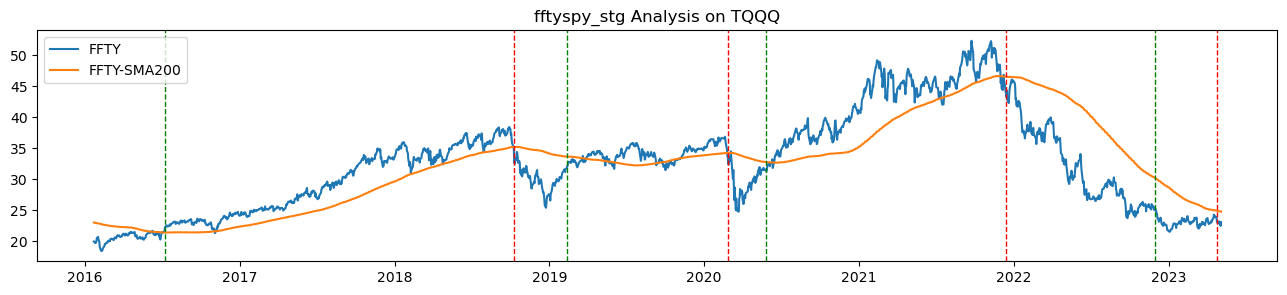

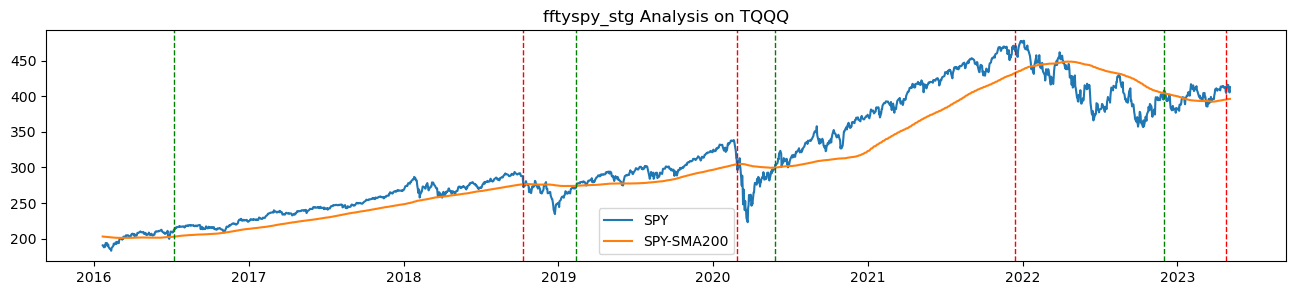

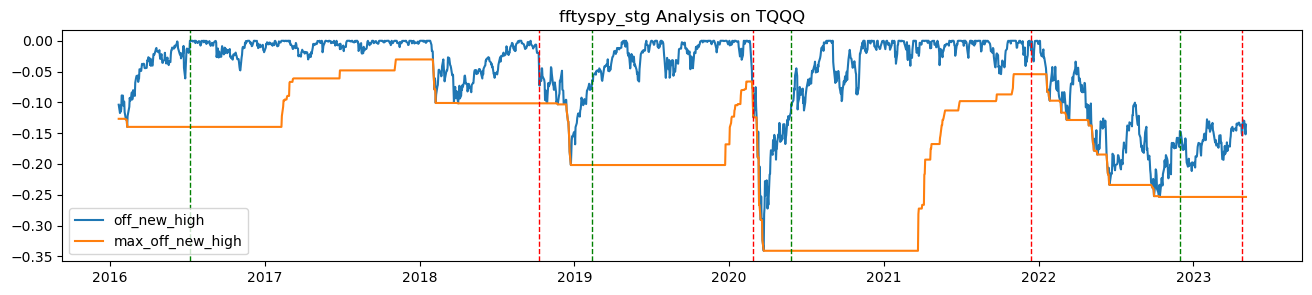

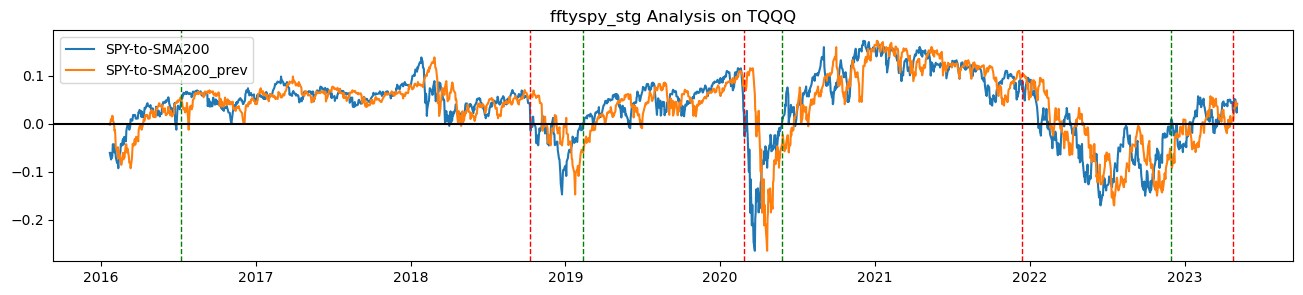

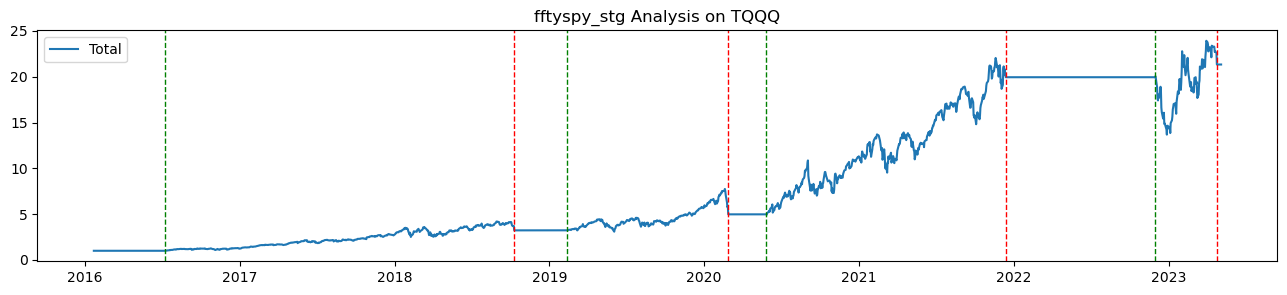

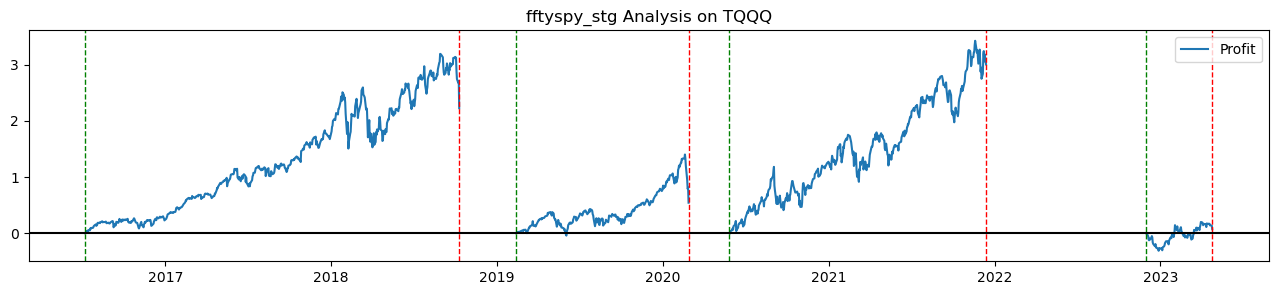

In [9]:
print(stg_bt.joined_data.columns)
print(stg.joined_data.columns)
stg_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
stg_bt.plot_joined_data(['FFTY', 'FFTY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['SPY', 'SPY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['off_new_high', 'max_off_new_high'], plot_start, plot_end)
stg_bt.plot_joined_data(['SPY-to-SMA200','SPY-to-SMA200_prev'], plot_start, plot_end, ydash_low=0)
stg_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)


fftyspy_stg:
cumulative return      : 2033.27%
compound anual return  : 54.8331%
max_drawdown           : -36.19%
sharp_ratio            : 7.47%
average of daily return: 0.2052%
std of daily return    : 2.7484%
number of trades       : 5,
trading days           : 2660,
batting Average        : 100.00%
Gain Average           : 146.15%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : 138.52%
Loss STD               : nan%
        
Index(['TQQQ', 'Weekday', 'Signal', 'BSignal', 'SSignal', 'Cash', 'Stock',
       'Total', 'Margin', 'Trade', 'Buy Price', 'Profit', 'FFTY',
       'FFTY-SMA200', 'FFTY_to_SMA200', 'FFTY_Signal', 'SPY', 'SPY-SMA200',
       'new_high', 'off_new_high', 'max_off_new_high', 'SPY-to-SMA200',
       'SPY-to-SMA200_prev', 'spy-ready-to-buy', 'SPY_Signal'],
      dtype='object')
Index(['FFTY', 'FFTY-SMA200', 'FFTY_to_SMA200', 'FFTY_Signal', 'SPY',
       'SPY-SMA200', 'new_high', 'off_new_high', 'max_off_new_high',
       'SPY-to-SMA

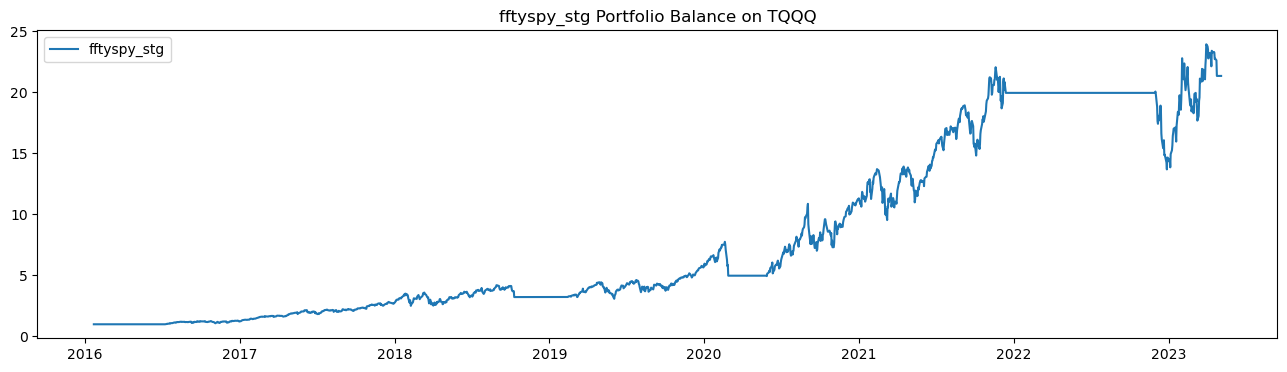

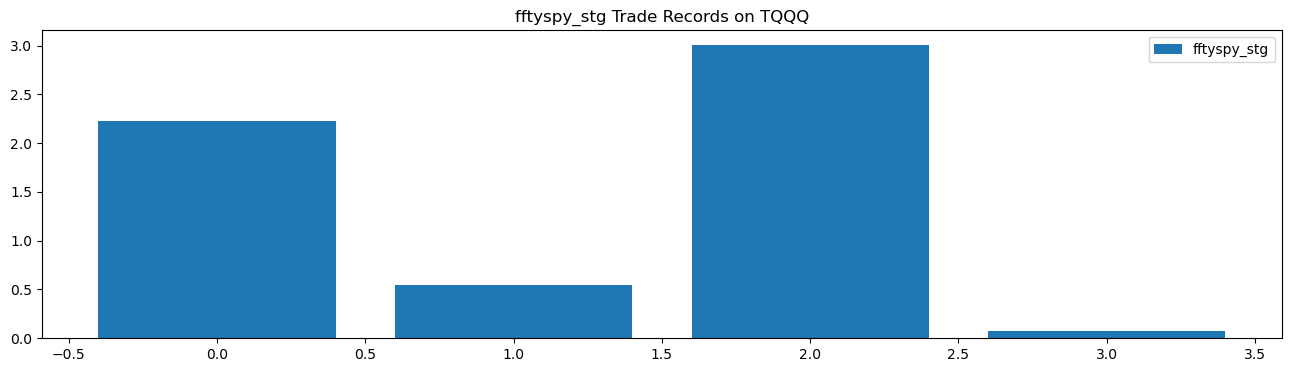

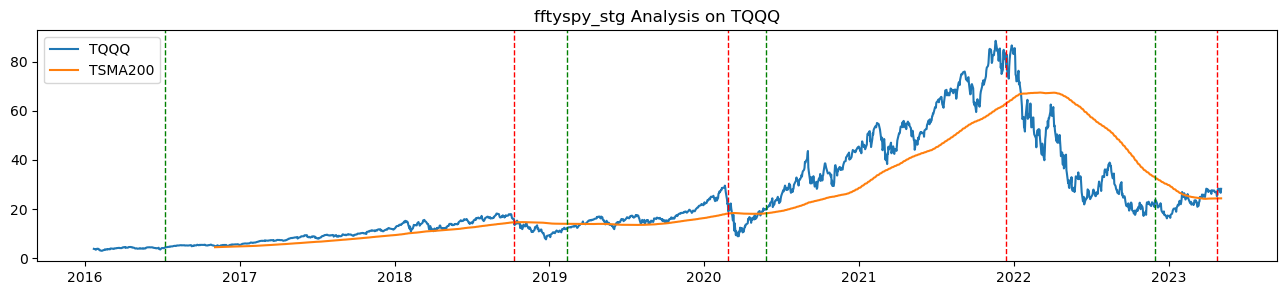

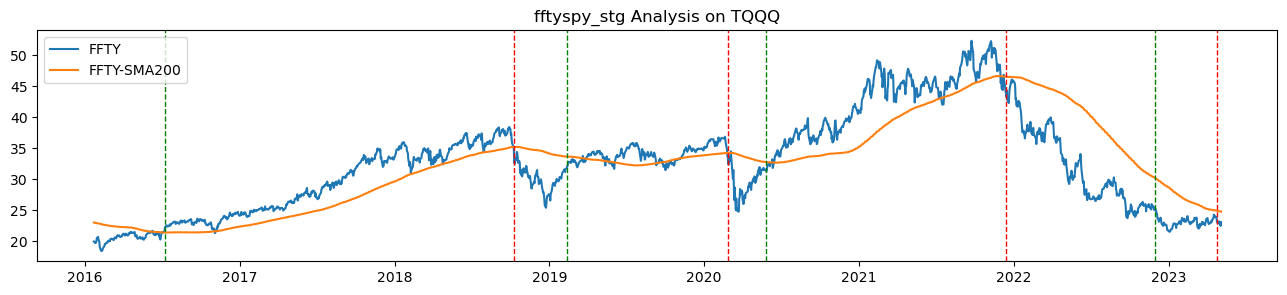

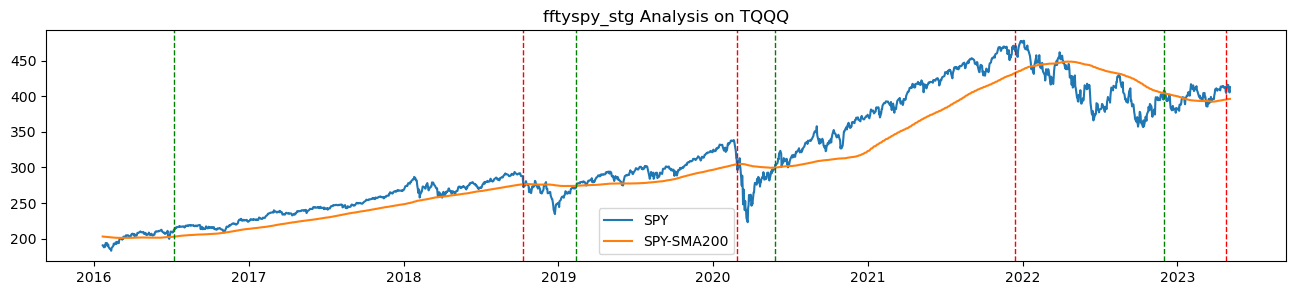

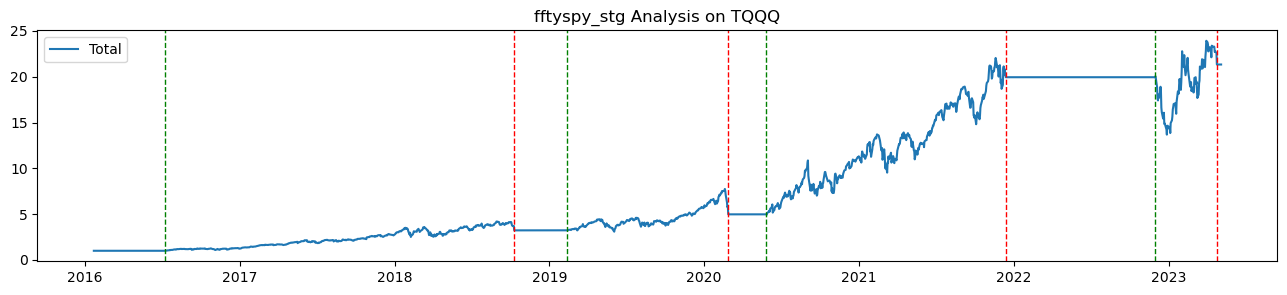

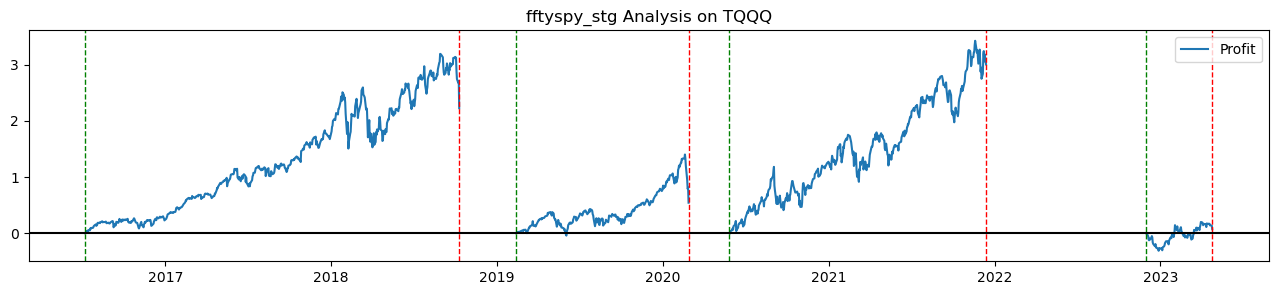

In [19]:
 
stg = ab.fftyspy_stg(ffty_sell_threshold = 0.95, ffty_buy_threshold = 1.02, 
                 spy_consecutive_buy_threshold = 1, spy_consecutive_days = 5,
                 spy_max_off_new_high_pct = -0.2)
stg.run_strategy([ffty,spy], test_start, test_end)
stg_bt = ab.BackTest()
stg_bt.run_backtest(stg,ticker,test_start,test_end)

stg_bt.plot_balance()
stg_bt.plot_records()
stg_bt.performance_summary()

print(stg_bt.joined_data.columns)
print(stg.joined_data.columns)
ab.get_sma(stg_bt.joined_data, ticker.ticker, 'TSMA200', 200)
stg_bt.plot_joined_data([ticker.ticker, 'TSMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['FFTY', 'FFTY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['SPY', 'SPY-SMA200',], plot_start, plot_end)
stg_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
stg_bt.trade_records